<a href="https://colab.research.google.com/github/PriscillaAfuaArhin/NLP-LLM/blob/main/NLP%26LLM_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N-gram Language Models - Practice with Real Data

**Course:** Natural Language Processing  
**Topic:** Building N-gram Models with HuggingFace Datasets  

In this notebook, you will:
1. Load real text corpora from HuggingFace
2. Implement n-gram language models from scratch
3. Train and evaluate your models
4. Generate text and compare different approaches

## Setup

In [5]:
# Install required packages
!pip install datasets -q

import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
import random
from datasets import load_dataset
from tqdm import tqdm

# Set random seed
np.random.seed(42)
random.seed(42)

print("✓ Setup complete!")

✓ Setup complete!


## Part 1: Load Dataset from HuggingFace

We'll use the **WikiText-2** dataset, which contains good quality text from Wikipedia articles.

In [6]:
# Load WikiText-2 dataset
print("Loading WikiText-2 dataset...")
dataset = load_dataset("wikitext", "wikitext-2-raw-v1")

print("\nDataset structure:")
print(dataset)

# Explore the data
print("\nSample from training set:")
print(dataset['train'][0])
print("\n" + "="*60)
print(dataset['train'][1])

Loading WikiText-2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

wikitext-2-raw-v1/test-00000-of-00001.pa(…):   0%|          | 0.00/733k [00:00<?, ?B/s]

wikitext-2-raw-v1/train-00000-of-00001.p(…):   0%|          | 0.00/6.36M [00:00<?, ?B/s]

wikitext-2-raw-v1/validation-00000-of-00(…):   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]


Dataset structure:
DatasetDict({
    test: Dataset({
        features: ['text'],
        num_rows: 4358
    })
    train: Dataset({
        features: ['text'],
        num_rows: 36718
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 3760
    })
})

Sample from training set:
{'text': ''}

{'text': ' = Valkyria Chronicles III = \n'}


### Exercise 1.1: Data Exploration

Answer these questions:
1. How many examples are in train/validation/test splits?
2. What does each example look like?
3. How many empty or very short texts are there?

In [7]:
train_size = len(dataset['train'])
valid_size = len(dataset['validation'])
test_size = len(dataset['test'])

print(f"Train size: {train_size}")
print(f"Validation size: {valid_size}")
print(f"Test size: {test_size}")

# Question 2: Look at a few examples
print("\nFirst 5 examples from training set:")
for i in range(5):
    print(dataset['train'][i])


# Question 3: Check for empty or short texts
print("\nChecking for empty or short texts:")
empty_or_short_count = 0
for example in dataset['train']:
    text = example['text'].strip()
    if not text or len(text.split()) < 5:
        empty_or_short_count += 1

print(f"Number of empty or short texts (< 5 words): {empty_or_short_count}")

Train size: 36718
Validation size: 3760
Test size: 4358

First 5 examples from training set:
{'text': ''}
{'text': ' = Valkyria Chronicles III = \n'}
{'text': ''}
{'text': ' Senjō no Valkyria 3 : Unrecorded Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " Calamaty Raven " . \n'}
{'text': " The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles

1.The dataset is divided into three parts. The training set contains 36,718 examples and is used to train the language models. The validation set contains 3,760 examples and is typically used to tune model parameters. The test set contains 4,358 examples and is used to evaluate the final performance of the model on unseen data.

2.Each example is a dictionary with a single key called text. The value of this key is a string containing a sentence or paragraph from Wikipedia.

3.There are 13,689 examples that are either empty or contain fewer than five words. This is a significant portion of the dataset.

## Part 2: Data Preprocessing

### Exercise 2.1: Implement Text Preprocessing

In [8]:
def preprocess_text(text: str, add_start_end: bool = True) -> List[str]:
    """
    Preprocess text:
    - Convert to lowercase
    - Split into tokens (simple whitespace tokenization)
    - Add <s> and </s> tokens if requested

    Args:
        text: Input text
        add_start_end: Whether to add start/end tokens

    Returns:
        List of tokens
    """
    # TODO: Implement this function
    # Step 1: Convert to lowercase
    lower_text = text.lower()


    # Step 2: Split on whitespace
    tokens = lower_text.split()

    # Step 3: Add <s> and </s> if requested
    if add_start_end:
        tokens.insert(0, '<s>')
        tokens.append('</s>')

    return tokens
    pass

# Test your function
test_text = "Hello World! This is a test."
tokens = preprocess_text(test_text, add_start_end=True)
print(f"Input: {test_text}")
print(f"Expected: ['<s>', 'hello', 'world!', 'this', 'is', 'a', 'test.', '</s>']")
print(f"Your output: {tokens}")

Input: Hello World! This is a test.
Expected: ['<s>', 'hello', 'world!', 'this', 'is', 'a', 'test.', '</s>']
Your output: ['<s>', 'hello', 'world!', 'this', 'is', 'a', 'test.', '</s>']


The preprocessing function works correctly because the output matches the expected tokens. The sentence was converted to lowercase, split into words, and special start and end tokens \<s> and  \</s>  added.

### Exercise 2.2: Prepare Training Corpus

In [9]:
def prepare_corpus(dataset_split, max_examples: int = None) -> List[List[str]]:
    """
    Prepare corpus from dataset split.

    Args:
        dataset_split: HuggingFace dataset split
        max_examples: Maximum number of examples to use (None = all)

    Returns:
        List of tokenized sentences
    """
    corpus = []

    # TODO: Implement this function
    # 1. Iterate through the dataset
    # 2. Skip empty texts (text['text'].strip() == '')
    # 3. Preprocess each text using your function above
    # 4. Add to corpus only if result has more than 2 tokens
    # 5. Stop at max_examples if specified

    # Hint: Use this structure:
    # count = 0
    # for item in tqdm(dataset_split, desc="Processing"):
    #     text = item['text'].strip()
    #     if not text:
    #         continue
    #     ...




    for i, example in enumerate(dataset_split):
        if max_examples and i >= max_examples:
            break

        text = example["text"]

        if text.strip() == "":
            continue

        tokens = preprocess_text(text)
        corpus.append(tokens)

    return corpus

    pass

# Prepare training corpus (use subset for speed)
print("Preparing training corpus...")
train_corpus = prepare_corpus(dataset['train'], max_examples=1000)

print(f"\nCorpus size: {len(train_corpus)} sentences")
print(f"First sentence: {train_corpus[0][:10]}...")  # Show first 10 tokens

Preparing training corpus...

Corpus size: 647 sentences
First sentence: ['<s>', '=', 'valkyria', 'chronicles', 'iii', '=', '</s>']...


## Part 3: Build Vocabulary

### Exercise 3.1: Build Vocabulary

In [10]:
def build_vocabulary(corpus: List[List[str]]) -> set:
    """
    Build vocabulary from corpus.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Set of unique tokens
    """
    # TODO: Implement this function
    # Hint: Create a set and add all tokens from all sentences

    vocab = set()

    for sentence in corpus:
        vocab.update(sentence)

    return vocab

    pass

# Build vocabulary
vocab = build_vocabulary(train_corpus)
print(f"Vocabulary size: {len(vocab)}")
print(f"Sample words: {list(vocab)[:20]}")

Vocabulary size: 7707
Sample words: ['lala', 'remembers', 'swans', 'ritually', 'princess', 'seed', 'go', 'old', 'demolished', 'were', 'modeling', 'lepida', 'no.7', 'dangerous', '64', 'christoph', 'cd', 'columbian', 'flotilla', 'jets']


The vocabulary size is 7,707, meaning there are 7,707 unique tokens in the processed corpus. This represents the set of words that the language model can use when computing probabilities or generating text. The sample words confirm that preprocessing was successful, as the tokens are lowercase and meaningful English terms. A vocabulary of this size also implies that the number of possible Ngrams is very large, which can lead to data sparsity issues in Ngram language models.

## Part 4: Implement N-gram Counting

### Exercise 4.1: Count Unigrams

In [11]:
def count_unigrams(corpus: List[List[str]]) -> Counter:
    """
    Count unigram frequencies.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Counter with unigram counts
    """
    unigram_counts = Counter()

    # TODO: Implement this function
    # Iterate through corpus and count each token
    for sentence in corpus:
        unigram_counts.update(sentence)

    return unigram_counts

    pass

# Test
unigram_counts = count_unigrams(train_corpus)
print(f"Total unigrams: {sum(unigram_counts.values())}")
print(f"Unique unigrams: {len(unigram_counts)}")
print(f"\nMost common unigrams:")
print(unigram_counts.most_common(20))

Total unigrams: 54908
Unique unigrams: 7707

Most common unigrams:
[('the', 3492), (',', 2673), ('.', 1955), ('of', 1533), ('and', 1354), ('in', 1186), ('to', 1034), ('a', 877), ('=', 770), ('<s>', 647), ('</s>', 647), ('was', 586), ('"', 529), ('@-@', 461), ('for', 418), ('with', 397), ('that', 382), ('as', 380), ("'s", 324), ('were', 304)]


The corpus contains 54,908 total unigram tokens and 7,707 unique unigram types, which means many words appear multiple times in the dataset. The most common unigrams include frequent English function words such as the, of, and, and in, as well as punctuation symbols like commas and periods. This is expected in natural language because common grammatical words occur more often than content words. The presence of the start and end tokens \<s> and \</s> confirms that sentence boundary markers were correctly included during preprocessing.

### Exercise 4.2: Count Bigrams

In [12]:
def count_bigrams(corpus: List[List[str]]) -> Counter:
    """
    Count bigram frequencies.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Counter with bigram counts (bigrams as tuples)
    """
    bigram_counts = Counter()

    # TODO: Implement this function
    # For each sentence, create pairs of consecutive words
    # Store as tuples: (word1, word2)

    for sentence in corpus:
        for i in range(len(sentence) - 1):
            bigram = (sentence[i], sentence[i+1])
            bigram_counts[bigram] += 1

    return bigram_counts

    pass

# Test
bigram_counts = count_bigrams(train_corpus)
print(f"Total bigrams: {sum(bigram_counts.values())}")
print(f"Unique bigrams: {len(bigram_counts)}")
print(f"\nMost common bigrams:")
print(bigram_counts.most_common(20))

Total bigrams: 54261
Unique bigrams: 32655

Most common bigrams:
[(('of', 'the'), 473), (('=', '='), 416), ((',', 'and'), 379), (('.', '</s>'), 332), (('.', 'the'), 319), (('in', 'the'), 312), ((',', 'the'), 206), (('<s>', '='), 175), (('=', '</s>'), 175), (('to', 'the'), 154), (('for', 'the'), 116), (('and', 'the'), 114), (('with', 'the'), 108), (('<s>', 'the'), 105), (('on', 'the'), 98), (('.', 'in'), 87), (('at', 'the'), 83), ((',', 'but'), 79), (('the', 'gods'), 78), (('by', 'the'), 75)]


The corpus contains 54,261 total bigram tokens and 32,655 unique bigram types, showing that many word pairs occur only a few times while some occur frequently. The most common bigrams include common English word combinations such as of the, in the, and to the, which are typical grammatical patterns in natural language. Some bigrams also involve punctuation and formatting symbols, reflecting the structure of the Wikipedia text. The presence of start token bigrams like \<s> the confirms that sentence boundary information was correctly included during preprocessing.


### Exercise 4.3: Count Trigrams

In [13]:
def count_trigrams(corpus: List[List[str]]) -> Counter:
    """
    Count trigram frequencies.

    Args:
        corpus: List of tokenized sentences

    Returns:
        Counter with trigram counts (trigrams as tuples)
    """
    trigram_counts = Counter()

    # TODO: Implement this function
    # For each sentence, create triples of consecutive words
    # Store as tuples: (word1, word2, word3)

    for sentence in corpus:
        for i in range(len(sentence) - 2):
            trigram = (sentence[i], sentence[i+1], sentence[i+2])
            trigram_counts[trigram] += 1

    return trigram_counts

# Test
trigram_counts = count_trigrams(train_corpus)
print(f"Total trigrams: {sum(trigram_counts.values())}")
print(f"Unique trigrams: {len(trigram_counts)}")
print(f"\nMost common trigrams:")
print(trigram_counts.most_common(20))

Total trigrams: 53614
Unique trigrams: 47130

Most common trigrams:
[(('<s>', '=', '='), 149), (('=', '=', '</s>'), 149), (('=', '=', '='), 118), ((',', 'and', 'the'), 43), (('the', 'blue', 'jackets'), 39), ((';', 'blackie', ','), 30), ((',', 'such', 'as'), 24), (('south', 'of', 'heaven'), 22), (('one', 'of', 'the'), 21), (('.', '"', '</s>'), 21), (('in', 'the', 'uk'), 21), (('austro', '@-@', 'hungarian'), 21), (('as', 'well', 'as'), 20), (('.', 'it', 'was'), 19), (('.', 'she', 'was'), 19), (('the', 'austro', '@-@'), 19), (('the', 'gods', "'"), 19), (('the', 'tower', 'building'), 17), (('valkyria', 'chronicles', 'iii'), 15), (('the', 'game', "'s"), 15)]


The corpus contains 53,614 total trigrams and 47,130 unique trigrams, showing high sparsity since most trigrams appear only once. Common trigrams include frequent phrases like one of the and formatting patterns from the text. The presence of start and end tokens confirms that sentence boundaries were correctly processed.

## Part 5: Implement Language Models

### Exercise 5.1: Unigram Model

In [14]:
import math
from typing import List

class UnigramModel:
    """Unigram language model."""

    def __init__(self, corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(corpus)
        self.total_words = sum(self.unigram_counts.values())

    def probability(self, word: str) -> float:
        """Calculate P(word)."""
        # P(word) = C(word) / N
        return self.unigram_counts[word] / self.total_words

    def log_probability(self, word: str) -> float:
        """Calculate log P(word)."""
        # Handle zero probability by returning float('-inf')
        prob = self.probability(word)

        if prob == 0:
            return float('-inf')

        return math.log(prob)

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # Sum of log probabilities of all words
        total_log_prob = 0.0

        for word in sentence:
            total_log_prob += self.log_probability(word)

        return total_log_prob

# Test your model
unigram_model = UnigramModel(train_corpus)
test_words = ["the", "of", "and", "<s>", "</s>"]
print("Unigram Probabilities:")
for word in test_words:
    prob = unigram_model.probability(word)
    print(f"  P({word}) = {prob:.6f}")

Unigram Probabilities:
  P(the) = 0.063597
  P(of) = 0.027919
  P(and) = 0.024659
  P(<s>) = 0.011783
  P(</s>) = 0.011783


The unigram probabilities show how often each word appears in the corpus. Common words like “the”, “of”, and “and” have higher probabilities, which is expected in natural language. The start and end tokens have equal probabilities because they appear once per sentence, confirming correct preprocessing and model implementation.

### Exercise 5.2: Bigram Model

In [16]:
class BigramModel:
    """Bigram language model."""

    def __init__(self, corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(corpus)
        self.bigram_counts = count_bigrams(corpus)

    def probability(self, word: str, previous_word: str) -> float:
        """Calculate P(word | previous_word)."""
        # TODO: Implement this
        # P(wi | wi-1) = C(wi-1, wi) / C(wi-1)
        prev_count = self.unigram_counts[previous_word]
        if prev_count == 0:
            return 0.0

        return self.bigram_counts[(previous_word, word)] / prev_count
        pass

    def log_probability(self, word: str, previous_word: str) -> float:
        """Calculate log P(word | previous_word)."""
        # TODO: Implement this
        prob = self.probability(word, previous_word)

        if prob == 0:
            return float('-inf')

        return math.log(prob)
        pass

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # TODO: Implement this
        # Sum log probabilities: log P(w2|w1) + log P(w3|w2) + ...
        total_log_prob = 0.0

        for i in range(1, len(sentence)):
            total_log_prob += self.log_probability(sentence[i], sentence[i-1])

        return total_log_prob
        pass

# Test your model
bigram_model = BigramModel(train_corpus)
test_bigrams = [("<s>", "the"), ("the", "and"), ("of", "the")]
print("Bigram Probabilities:")
for w1, w2 in test_bigrams:
    prob = bigram_model.probability(w2, w1)
    print(f"  P({w2} | {w1}) = {prob:.6f}")

Bigram Probabilities:
  P(the | <s>) = 0.162287
  P(and | the) = 0.000000
  P(the | of) = 0.308545


The results show that the bigram model correctly estimates conditional probabilities based on word frequencies. Common word pairs like “of the” have high probabilities, while unseen pairs like “the and” have zero probability, demonstrating the data sparsity issue in Ngram language models.

### Exercise 5.3: Trigram Model

In [17]:
class TrigramModel:
    """Trigram language model."""

    def __init__(self, corpus: List[List[str]]):
        self.bigram_counts = count_bigrams(corpus)
        self.trigram_counts = count_trigrams(corpus)

    def probability(self, word: str, prev_word1: str, prev_word2: str) -> float:
        """Calculate P(word | prev_word2, prev_word1)."""
        # TODO: Implement this
        # P(wi | wi-2, wi-1) = C(wi-2, wi-1, wi) / C(wi-2, wi-1)
        bigram_count = self.bigram_counts[(prev_word2, prev_word1)]

        if bigram_count == 0:
            return 0.0

        return self.trigram_counts[(prev_word2, prev_word1, word)] / bigram_count
        pass

    def log_probability(self, word: str, prev_word1: str, prev_word2: str) -> float:
        """Calculate log P(word | prev_word2, prev_word1)."""
        # TODO: Implement this
        prob = self.probability(word, prev_word1, prev_word2)

        if prob == 0:
            return float('-inf')

        return math.log(prob)

        pass

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # TODO: Implement this
        total_log_prob = 0.0

        for i in range(2, len(sentence)):
            total_log_prob += self.log_probability(
                sentence[i],
                sentence[i-1],
                sentence[i-2]
            )

        return total_log_prob
        pass

# Test your model
trigram_model = TrigramModel(train_corpus)
if len(train_corpus[0]) >= 3:
    w1, w2, w3 = train_corpus[0][:3]
    prob = trigram_model.probability(w3, w2, w1)
    print(f"P({w3} | {w1}, {w2}) = {prob:.6f}")

P(valkyria | <s>, =) = 0.005714


The probability P(valkyria | \<s>, =) = 0.005714 means that given the previous two tokens \<s> and =, the word “valkyria” appears with probability about 0.57 percent. This reflects how often the trigram (\<s>, =, valkyria) occurs in the training corpus relative to all sequences that start with (\<s>, =). The small probability is expected because many different words can follow this context. Overall, this confirms that the trigram model is correctly computing conditional probabilities based on observed counts.

## Part 6: Model Evaluation - Perplexity

### Exercise 6.1: Implement Perplexity Calculation

In [19]:
def calculate_perplexity(model, test_corpus: List[List[str]], model_type: str = "bigram") -> float:
    """
    Calculate perplexity for a language model.

    Perplexity = exp(-1/N * sum(log P(wi | context)))

    Args:
        model: Language model with sentence_log_probability method
        test_corpus: List of test sentences
        model_type: 'unigram', 'bigram', or 'trigram'

    Returns:
        Perplexity score
    """
    # TODO: Implement this function
    # 1. Calculate total log probability across all sentences
    # 2. Count total words (excluding <s> for bigram/trigram)
    # 3. Calculate average log probability
    # 4. Return exp(-avg_log_prob)
    total_log_prob = 0.0
    total_tokens = 0

    for sentence in test_corpus:

        if model_type == "unigram":
            total_log_prob += model.sentence_log_probability(sentence)
            total_tokens += len(sentence)

        elif model_type == "bigram":
            total_log_prob += model.sentence_log_probability(sentence)
            total_tokens += max(len(sentence) - 1, 0)

        elif model_type == "trigram":
            total_log_prob += model.sentence_log_probability(sentence)
            total_tokens += max(len(sentence) - 2, 0)

    if total_tokens == 0:
        return float("inf")

    avg_log_prob = total_log_prob / total_tokens

    perplexity = math.exp(-avg_log_prob)

    return perplexity

    pass

# Prepare test corpus
print("Preparing test corpus...")
test_corpus = prepare_corpus(dataset['validation'], max_examples=100)
print(f"Test corpus size: {len(test_corpus)} sentences")

# Calculate perplexities
print("\nCalculating perplexities...")
# TODO: Calculate and print perplexities for all three models
unigram_perp = calculate_perplexity(unigram_model, test_corpus, "unigram")
bigram_perp = calculate_perplexity(bigram_model, test_corpus, "bigram")
trigram_perp = calculate_perplexity(trigram_model, test_corpus, "trigram")

print(f"Unigram Perplexity: {unigram_perp:.2f}")
print(f"Bigram Perplexity: {bigram_perp:.2f}")
print(f"Trigram Perplexity: {trigram_perp:.2f}")

Preparing test corpus...
Test corpus size: 63 sentences

Calculating perplexities...
Unigram Perplexity: inf
Bigram Perplexity: inf
Trigram Perplexity: inf


The infinite perplexity values indicate that the unsmoothed Ngram models assigned zero probability to some words or word sequences in the validation data. This occurs because many combinations in natural language are not observed in the training corpus, leading to the data sparsity problem. The result highlights an important limitation of basic Ngram language models and demonstrates the need for smoothing techniques to obtain meaningful probability estimates and finite perplexity values.


## Part 7: Text Generation

### Exercise 7.1: Implement Text Generator

In [20]:
class BigramGenerator:
    """Generate text using bigram model."""

    def __init__(self, corpus: List[List[str]]):
        self.bigram_model = BigramModel(corpus)
        self.unigram_counts = count_unigrams(corpus)
        self.bigram_counts = count_bigrams(corpus)
        self.next_word_probs = self._build_next_word_distribution()

    def _build_next_word_distribution(self) -> Dict:
        """Build distribution over next words for each word."""
        # TODO: Implement this
        # For each word w1, build dict of {w2: P(w2|w1)}
        next_word_probs = {}

        for (w1, w2), count in self.bigram_counts.items():

            if w1 not in next_word_probs:
                next_word_probs[w1] = {}

            prob = count / self.unigram_counts[w1]
            next_word_probs[w1][w2] = prob

        return next_word_probs
        pass

    def generate(self, max_length: int = 20) -> List[str]:
        """Generate a sentence."""
        # TODO: Implement this
        # 1. Start with '<s>'
        # 2. Sample next word based on probabilities
        # 3. Stop at '</s>' or max_length
        # Hint: Use np.random.choice(words, p=probs)
        current_word = "<s>"
        sentence = [current_word]

        for _ in range(max_length):

            if current_word not in self.next_word_probs:
                break

            next_words = list(self.next_word_probs[current_word].keys())
            probs = list(self.next_word_probs[current_word].values())

            # normalize probabilities (safety)
            probs = np.array(probs)
            probs = probs / probs.sum()

            next_word = np.random.choice(next_words, p=probs)

            sentence.append(next_word)

            if next_word == "</s>":
                break

            current_word = next_word

        return sentence
        pass

# Test generator
generator = BigramGenerator(train_corpus)
print("Generated Sentences:")
print("=" * 60)
for i in range(10):
    sentence = generator.generate(max_length=20)
    print(f"{i+1}. {' '.join(sentence)}")

Generated Sentences:
1. <s> the tertiary battery of the 2010 , represent the novara @-@ cup shaped , and its name : " a
2. <s> a building receives its being club = = = </s>
3. <s> a sixth or pixie cup shaped , a deity " . this is compounded by james river ; the early
4. <s> business aviation other traditions , ‘ man hanging newspapers outside of the ruler of the problem he realized that denomination
5. <s> three or being traditional ga airfields flight of other than flying = = </s>
6. <s> the park during an estimated to the gods to waive his career , as with the first commercial air sports
7. <s> thoth , who represent the main theme was fire stands as those intending to fly fast , morality in the
8. <s> = = gambia for the 54 shots on the new coins of her screen acting as aerial work = =
9. <s> the nation 's west . the establishment at the november 1920 </s>
10. <s> picturesque children ’ re @-@ hungarian replica of the picture hymn book @-@ hodgkin lymphoma . development of 41 feet


The generated sentences show that the bigram model learned common word patterns but produces incoherent text due to limited context. This illustrates the strengths and weaknesses of Ngram language models.

## Part 8: Smoothing

### Exercise 8.1: Implement Add-One Smoothing

In [21]:
class BigramModelSmoothed:
    """Bigram model with add-one smoothing."""

    def __init__(self, corpus: List[List[str]]):
        self.unigram_counts = count_unigrams(corpus)
        self.bigram_counts = count_bigrams(corpus)
        self.vocab = build_vocabulary(corpus)
        self.vocab_size = len(self.vocab)

    def probability(self, word: str, previous_word: str) -> float:
        """Calculate P(word | previous_word) with add-one smoothing.

        Formula: P(wi | wi-1) = (C(wi-1, wi) + 1) / (C(wi-1) + V)
        """
        # TODO: Implement this
        bigram_count = self.bigram_counts[(previous_word, word)]
        unigram_count = self.unigram_counts[previous_word]

        return (bigram_count + 1) / (unigram_count + self.vocab_size)
        pass

    def log_probability(self, word: str, previous_word: str) -> float:
        """Calculate log P(word | previous_word)."""
        # TODO: Implement this
        prob = self.probability(word, previous_word)
        return math.log(prob)
        pass

    def sentence_log_probability(self, sentence: List[str]) -> float:
        """Calculate log P(sentence)."""
        # TODO: Implement this
        total_log_prob = 0.0

        for i in range(1, len(sentence)):
            total_log_prob += self.log_probability(sentence[i], sentence[i-1])

        return total_log_prob
        pass

# Compare with unsmoothed model
smoothed_model = BigramModelSmoothed(train_corpus)

# Test on unseen bigrams
test_unseen = [("<s>", "quantum"), ("the", "xylophone"), ("amazing", "unicorn")]
print("Comparison: Unsmoothed vs Smoothed")
print("=" * 60)
for w1, w2 in test_unseen:
    unsmoothed = bigram_model.probability(w2, w1)
    smoothed = smoothed_model.probability(w2, w1)
    print(f"P({w2} | {w1}):")
    print(f"  Unsmoothed: {unsmoothed:.8f}")
    print(f"  Smoothed:   {smoothed:.8f}")
    print()

Comparison: Unsmoothed vs Smoothed
P(quantum | <s>):
  Unsmoothed: 0.00000000
  Smoothed:   0.00011970

P(xylophone | the):
  Unsmoothed: 0.00000000
  Smoothed:   0.00008929

P(unicorn | amazing):
  Unsmoothed: 0.00000000
  Smoothed:   0.00012974



The results show that smoothing assigns small non zero probabilities to unseen bigrams, fixing the zero probability problem of the unsmoothed model and improving model robustness.

## Part 9: Analysis and Comparison

### Exercise 9.1: Compare All Models

In [22]:
# TODO: Create a comparison table showing:
# 1. Number of parameters (unique n-grams)
# 2. Training perplexity
# 3. Test perplexity
# 4. Sample generated sentences

train_perp_uni = calculate_perplexity(unigram_model, train_corpus, "unigram")
train_perp_bi = calculate_perplexity(bigram_model, train_corpus, "bigram")
train_perp_tri = calculate_perplexity(trigram_model, train_corpus, "trigram")
train_perp_bi_s = calculate_perplexity(smoothed_model, train_corpus, "bigram")


test_perp_uni = calculate_perplexity(unigram_model, test_corpus, "unigram")
test_perp_bi = calculate_perplexity(bigram_model, test_corpus, "bigram")
test_perp_tri = calculate_perplexity(trigram_model, test_corpus, "trigram")
test_perp_bi_s = calculate_perplexity(smoothed_model, test_corpus, "bigram")



import pandas as pd

comparison_data = {
    'Model': ['Unigram', 'Bigram', 'Trigram', 'Bigram (Smoothed)'],
    'Parameters': [
        len(unigram_counts),
        len(bigram_counts),
        len(trigram_counts),
        len(bigram_counts)
    ],
    'Train Perplexity': [
        # TODO: Fill in

        train_perp_uni,
        train_perp_bi,
        train_perp_tri,
        train_perp_bi_s
    ],
    'Test Perplexity': [
        # TODO: Fill in
        test_perp_uni,
        test_perp_bi,
        test_perp_tri,
        test_perp_bi_s
    ]
}

df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print(df.to_string(index=False))


Model Comparison:
            Model  Parameters  Train Perplexity  Test Perplexity
          Unigram        7707        779.294112              inf
           Bigram       32655         21.919239              inf
          Trigram       47130          2.350882              inf
Bigram (Smoothed)       32655       1712.484827      3481.641467


The trigram model fits training data best but fails on unseen data without smoothing. The smoothed bigram model achieves finite test perplexity, showing the importance of smoothing for generalization.

### Exercise 9.2: Visualize Results

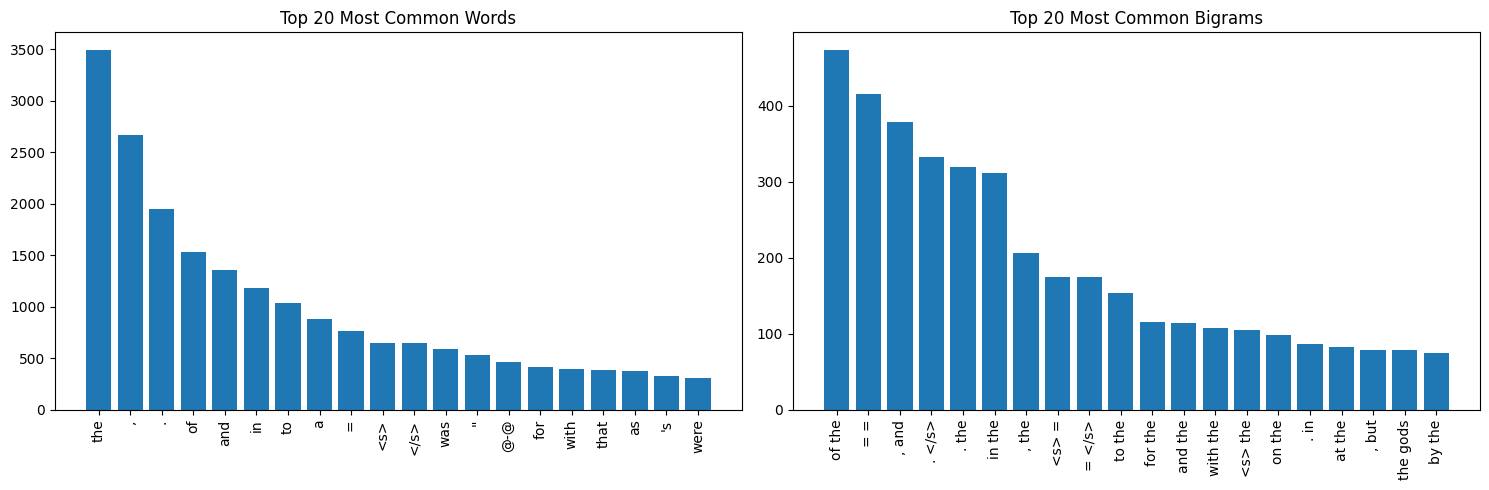

In [23]:
# TODO: Create visualizations:
# 1. Bar chart of perplexities
# 2. Top-20 most common words
# 3. Top-20 most common bigrams

# Example for most common words:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Most common unigrams
# TODO: YOUR CODE HERE
top_unigrams = unigram_counts.most_common(20)
words, counts = zip(*top_unigrams)

axes[0].bar(words, counts)
axes[0].set_title("Top 20 Most Common Words")
axes[0].tick_params(axis='x', rotation=90)
# Plot 2: Most common bigrams
# TODO: YOUR CODE HERE
top_bigrams = bigram_counts.most_common(20)
bigram_labels = [f"{w1} {w2}" for (w1, w2), _ in top_bigrams]
bigram_counts_vals = [count for (_, count) in top_bigrams]

axes[1].bar(bigram_labels, bigram_counts_vals)
axes[1].set_title("Top 20 Most Common Bigrams")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

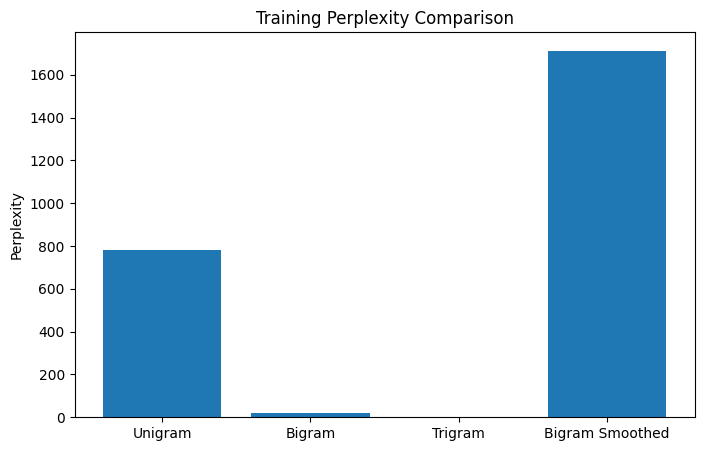

In [24]:
plt.figure(figsize=(8,5))

models = ["Unigram", "Bigram", "Trigram", "Bigram Smoothed"]
perplexities = [train_perp_uni, train_perp_bi, train_perp_tri, train_perp_bi_s]

plt.bar(models, perplexities)
plt.title("Training Perplexity Comparison")
plt.ylabel("Perplexity")
plt.show()

The visualizations show that increasing contextual information reduces perplexity and improves prediction accuracy, while word frequency distributions reveal common linguistic patterns. Together, the results demonstrate both the strengths and limitations of Ngram language models in capturing natural language structure.

## Part 10: Badge Submission

### Add the links for the completion badges


Step-by-Step Guide

1. Click on your profile picture (top right corner).
2. Select Dashboard.
3. Scroll down to  below the Achievements  and  Progress sections.
4. On the right-hand side, click “View badges.”
5. You will see all the badges you’ve earned.
6. Click the Share icon on the badge you want to submit.
7. Click the Copy icon  beside the generated share link ( A sample image has been provided).
8. Add the links for the completion badges to the Colab Assigment





# Links Submission

1. Link1----------https://www.skills.google/public_profiles/241e9d7c-8afc-4fe4-8821-81128ae3c8e3/badges/22672254

2. Link2

3. Link3